# Apprenticeship Learning via IRL - Q Learning

In [1]:
import gym
import numpy as np
from tqdm import tqdm
import imageio
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output, display, Image

from q_learn_pendulum import QTrainer

## Pendulum-v1

Description:
- The inverted pendulum swingup problem is a classic challenge in control theory.
- It consists of a pendulum attached at one end to a fixed point, with the other end free to move.

\
Objective: The goal is to swing the pendulum from a random position to an upright position, where its center of gravity is directly above the fixed point.

\
Observations

Num | Observation | Min | Max
---|---|---|---
0 | x = cos(theta) | -1.0 | 1.0
1 | y = sin(angle) | -1.0 | 1.0
2 | Angular Velocity |-8.0 | 8.0

\
Actions:
Num | Action | Min | Max
--- | --- | --- | ---
0 | Torque | -2.0 | 2.0

\
The reward function is defined as:

r = -(θ^2 + 0.1 * θ_dt^2 + 0.001 * torque^2)

where θ is the pendulum’s angle normalized between [-π, π] (with 0 being in the upright position). 

Based on the above equation, 
- The minimum reward that can be obtained is -(π^2 + 0.1 * 8^2 + 0.001 * 2^2) = -16.2736044.
- The maximum reward is 0, indicating the pendulum is upright with zero velocity and no torque applied.


Environment : 

Observation Space: Box(3,)

Action Space:  Box(1,)

Initial State:  [0.43824581 0.89885517 0.92853466]

A step in the env: (array([0.36386738, 0.93145076, 1.62459237]), -1.3342957421967985, False, {})


Rendered Environment: 


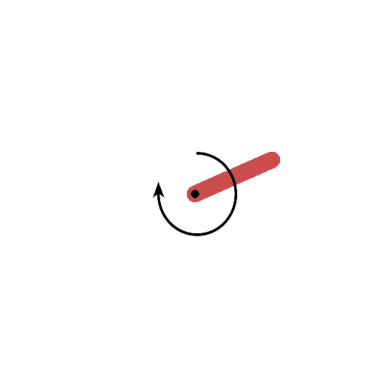

In [2]:
env = gym.make('Pendulum-v0', g=9.81)
print('\nEnvironment : ')
print('\nObservation Space:', env.observation_space)
print('\nAction Space: ', env.action_space)
print('\nInitial State: ',env.reset())
print('\nA step in the env:', env.step(env.action_space.sample()))
print('\n\nRendered Environment: ')
env.reset()
plt.axis('off')
plt.imshow(env.render(mode='rgb_array'))
env.close()
plt.show()

## Training - Obtain Expert Policy

1. **Agent Initialization:**
   - Initialize an agent for Q-learning.

2. **Q-Table Initialization:**
   - Create a Q-table to represent the policy.
   - Dimensions: 10000 x 2 (states x actions).
   - Initialize rewards in the Q-table.

3. **Training with Q-Learning:**
   - Utilize an epsilon-greedy strategy to choose actions during training.
   - Explore with probability ε and exploit with probability 1-ε.

4. **Update Q-Table:**
   - Update Q-values iteratively based on the Q-learning update rule.
   - Q-value for a state-action pair is a weighted sum of the immediate reward and the maximum expected future rewards.

5. **Exploration and Exploitation:**
   - Balance exploration and exploitation through the epsilon-greedy strategy.
   - Exploration allows discovering optimal actions, while exploitation focuses on maximizing immediate rewards.

6. **Iterative Training:**
   - Repeat the training process over multiple episodes or iterations.

7. **Policy:**
   - The Q-table represents the learned policy, with each row corresponding to a state and each column to an action.

8. **Expert Policy for IRL:**
   - The trained Q-learning agent serves as an expert policy for Inverse Reinforcement Learning (IRL).

- The Q-learning algorithm aims to iteratively improve the policy by updating Q-values based on observed rewards, guiding the agent toward optimal actions in different states.

In [3]:
q_trainer = QTrainer(env, discrete_space_size=[21, 21, 65], discrete_act_size=17, GAMMA=0.95, ALPHA=0.1)

print('\nNo. of actions after discretization: ', len(q_trainer.action_space))
print('\nAction Space: ', q_trainer.action_space.values())


No. of actions after discretization:  17

Action Space:  dict_values([[-2.0], [-1.75], [-1.5], [-1.25], [-1.0], [-0.75], [-0.5], [-0.25], [0.0], [0.25], [0.5], [0.75], [1.0], [1.25], [1.5], [1.75], [2.0]])


In [4]:
# Training

episode_lengths, episode_rewards, expert_Q = q_trainer.q_learning_train(num_episodes=100000, 
                                                                        print_interval=5000, 
                                                                        save_q_path='./data/expert_Q_Table.npy',
                                                                        render_save_path='../Results/Q Learning - Pendulum/expert_training')

Training Episodes..:   5%|▊              | 5030/100000 [00:26<07:18, 216.35it/s]

Episode: 5000, Epsilon: 0.0999, Reward: -378.57240144091435


Training Episodes..:  10%|█▍             | 9995/100000 [00:49<06:46, 221.44it/s]

Episode: 10000, Epsilon: 0.0999, Reward: -1208.1264258419828


Training Episodes..:  15%|██            | 15028/100000 [01:16<06:38, 213.30it/s]

Episode: 15000, Epsilon: 0.0999, Reward: -1240.0276104439731


Training Episodes..:  20%|██▊           | 19994/100000 [01:39<05:58, 223.11it/s]

Episode: 20000, Epsilon: 0.0999, Reward: -1240.4970636969035


Training Episodes..:  25%|███▌          | 25040/100000 [02:06<05:41, 219.72it/s]

Episode: 25000, Epsilon: 0.0999, Reward: -1569.2610874104257


Training Episodes..:  30%|████▏         | 30000/100000 [02:29<05:18, 219.81it/s]

Episode: 30000, Epsilon: 0.0999, Reward: -0.8125717469222903


Training Episodes..:  35%|████▉         | 35040/100000 [02:56<04:55, 219.80it/s]

Episode: 35000, Epsilon: 0.0999, Reward: -1298.1814950889225


Training Episodes..:  40%|█████▌        | 39986/100000 [03:19<04:36, 217.03it/s]

Episode: 40000, Epsilon: 0.0999, Reward: -855.1413705805531


Training Episodes..:  45%|██████▎       | 45021/100000 [03:45<04:23, 208.97it/s]

Episode: 45000, Epsilon: 0.0999, Reward: -1009.8648177327319


Training Episodes..:  50%|██████▉       | 49994/100000 [04:08<03:47, 219.90it/s]

Episode: 50000, Epsilon: 0.0999, Reward: -377.21313650290205


Training Episodes..:  55%|███████▋      | 55029/100000 [04:35<03:21, 222.87it/s]

Episode: 55000, Epsilon: 0.0999, Reward: -529.9936921896509


Training Episodes..:  60%|████████▍     | 59980/100000 [04:57<03:01, 220.92it/s]

Episode: 60000, Epsilon: 0.0999, Reward: -735.2996792214707


Training Episodes..:  65%|█████████     | 65027/100000 [05:24<02:39, 219.42it/s]

Episode: 65000, Epsilon: 0.0999, Reward: -243.1481350405895


Training Episodes..:  70%|█████████▊    | 69998/100000 [05:49<02:27, 203.12it/s]

Episode: 70000, Epsilon: 0.0999, Reward: -126.96812963188088


Training Episodes..:  75%|██████████▌   | 75025/100000 [06:17<02:13, 186.54it/s]

Episode: 75000, Epsilon: 0.0999, Reward: -123.00357999530851


Training Episodes..:  80%|███████████▏  | 79982/100000 [06:41<01:33, 214.00it/s]

Episode: 80000, Epsilon: 0.0999, Reward: -246.7891232758607


Training Episodes..:  85%|███████████▉  | 85036/100000 [07:08<01:07, 221.18it/s]

Episode: 85000, Epsilon: 0.0999, Reward: -120.47398109161476


Training Episodes..:  90%|████████████▌ | 89987/100000 [07:31<00:45, 220.67it/s]

Episode: 90000, Epsilon: 0.0999, Reward: -255.47232571090854


Training Episodes..:  95%|█████████████▎| 95035/100000 [07:57<00:22, 221.51it/s]

Episode: 95000, Epsilon: 0.0999, Reward: -247.4978347919113


Training Episodes..: 100%|█████████████| 100000/100000 [08:20<00:00, 199.96it/s]


Episode: 100000, Epsilon: 0.0999, Reward: -126.35593413272461


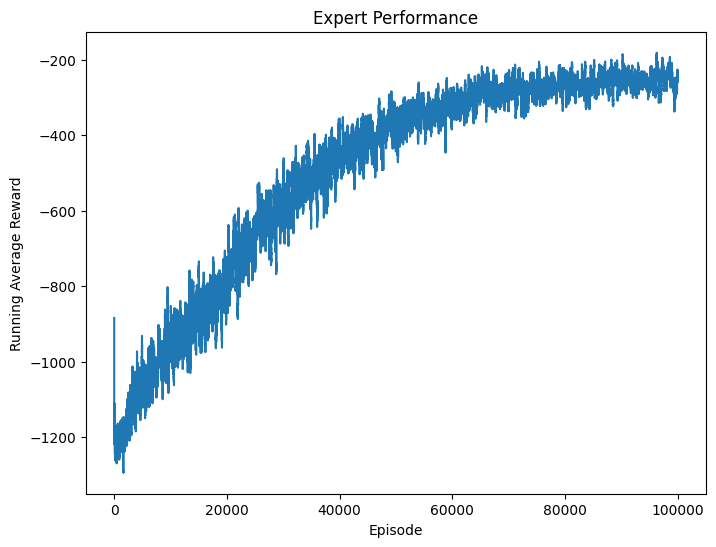

In [5]:
# Plot performance

q_trainer.plot_performance(episode_rewards,title="Expert Performance",save=True,
                 filename='../Results/Q Learning - Pendulum/Expert Performance')

Running Policy...: 100%|███████████████████| 1000/1000 [00:02<00:00, 347.90it/s]


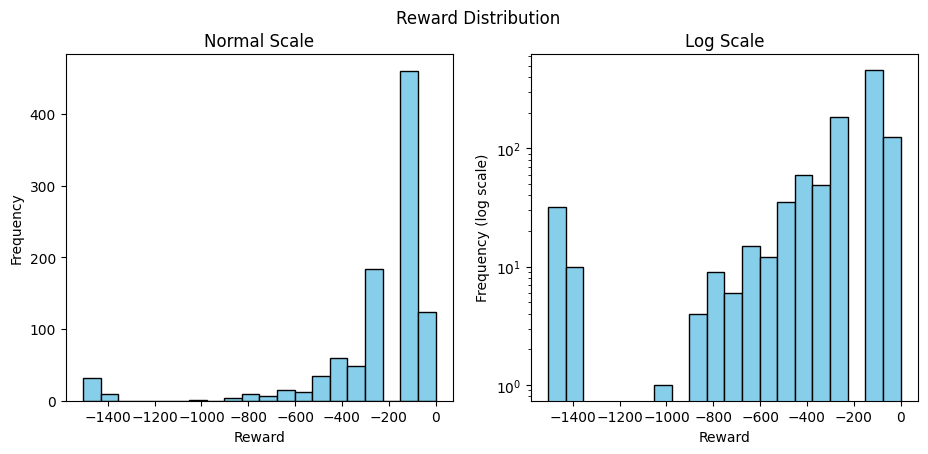

In [6]:
# Training result
# Using the learned policy, simulate the environment 1000 times to sample the reward distribution.

expert_reward = q_trainer.run_policy(num_episodes=1000, render=False)
q_trainer.plot_reward_dist(expert_reward)

Running Policy...: 100%|██████████████████████████| 1/1 [00:03<00:00,  3.32s/it]


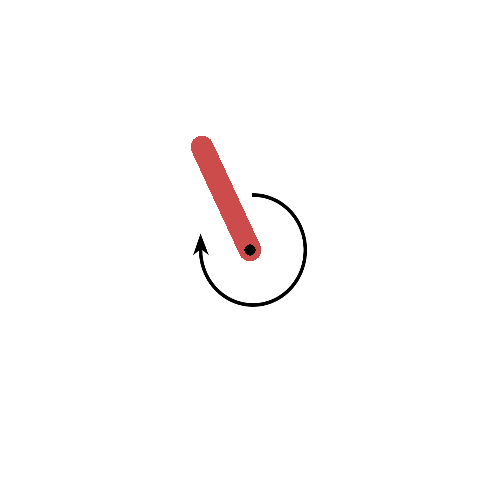

Expert Reward -  [-2.2135022771560267]


In [8]:
# Visualize policy in action

expert_reward = q_trainer.run_policy(expert_Q, num_episodes=1, 
                           render=True, render_filename='../Results/Q Learning - Pendulum/Expert Policy')
print('Expert Reward - ',expert_reward)